In [14]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [15]:

from sklearn.datasets import fetch_california_housing
cali_dataset = fetch_california_housing()

In [16]:
print(cali_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [17]:
print(cali_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [18]:
california = pd.DataFrame(cali_dataset.data, columns=cali_dataset.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
california['MEDV'] = cali_dataset.target
california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

# Data Visualization
This section is used to explore different types of data representations that could be helpful to perform visual analysis and plausibility.


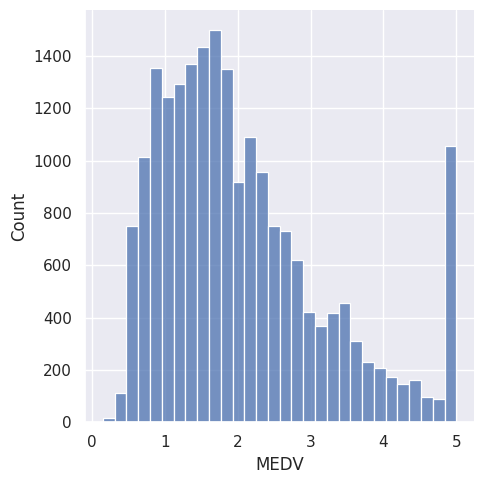

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(california['MEDV'], bins=30)
plt.show()

<Axes: >

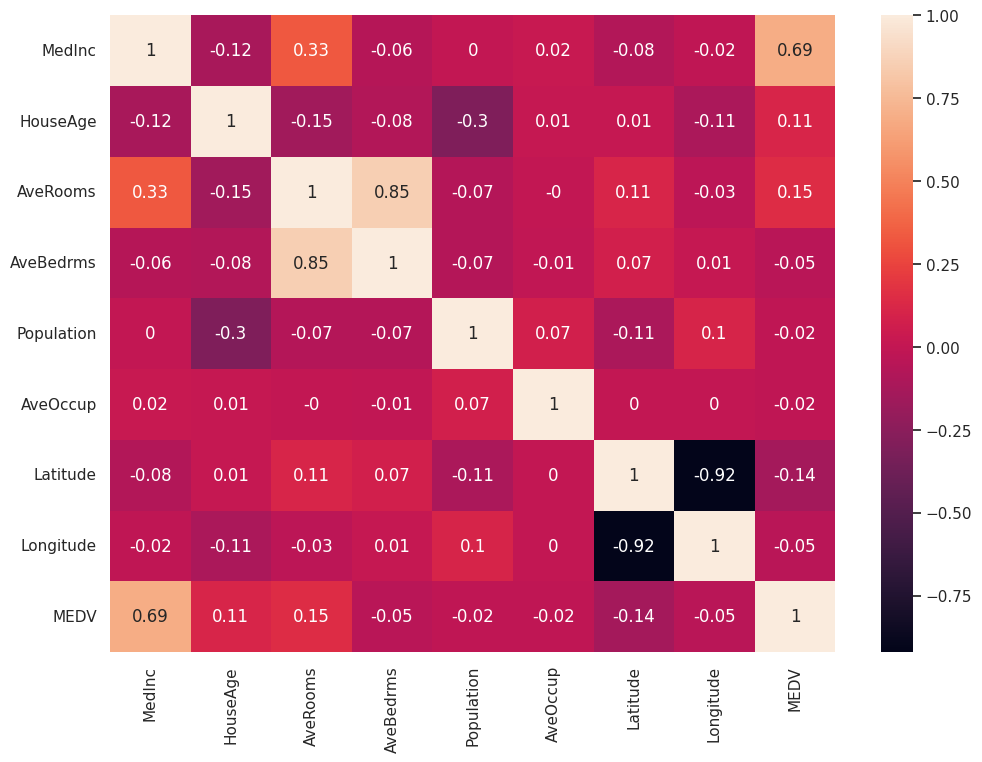

In [21]:

correlation_matrix = california.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_transformer = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_poly_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.46430152383011053


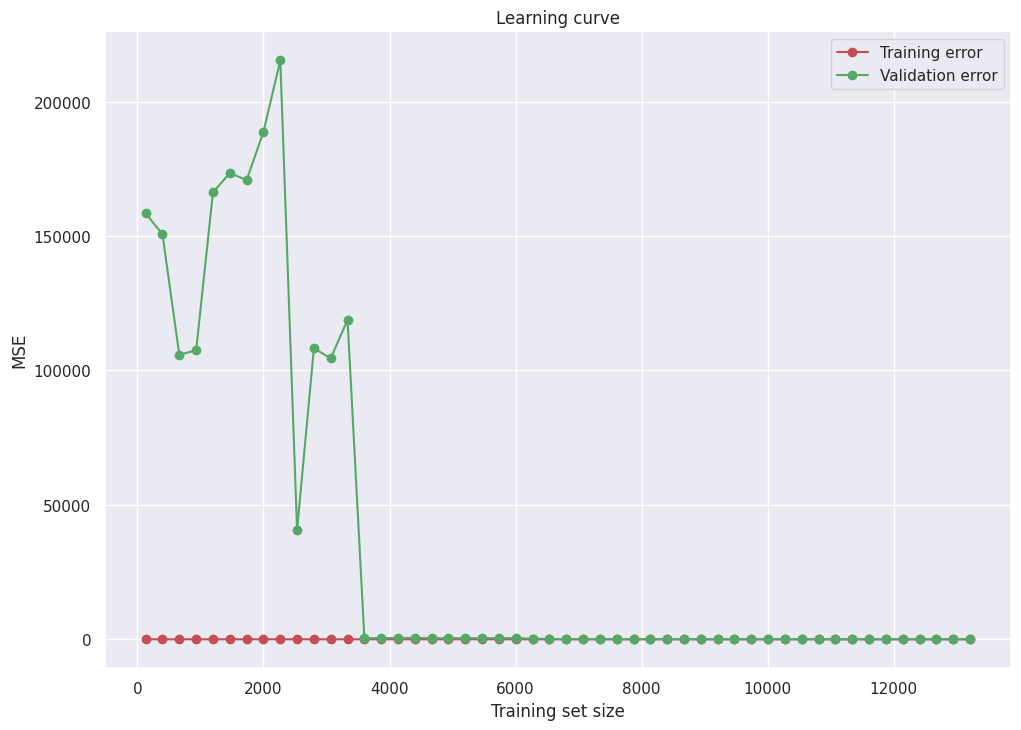

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X_train_poly_scaled,
    y=y_train,
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv=5,
    scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation error")
plt.title('Learning curve')
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.show()


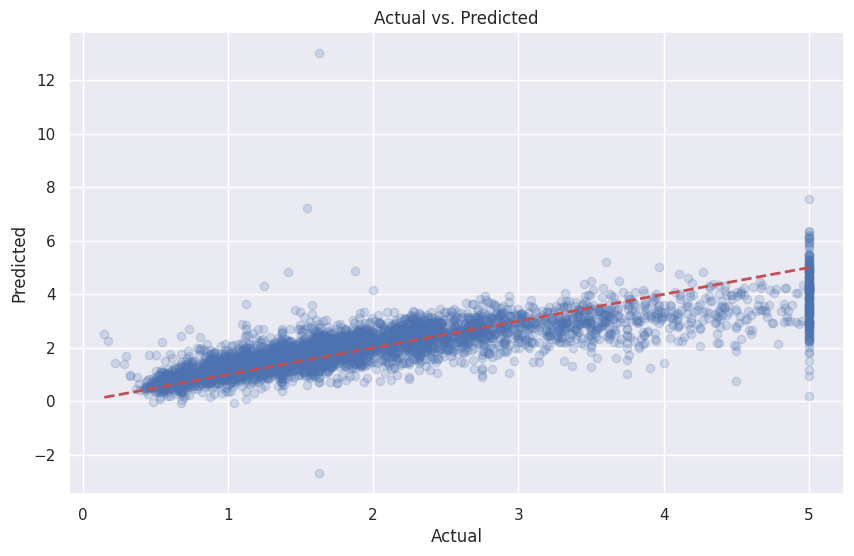

In [30]:
y_train_pred = model.predict(X_train_poly_scaled)
y_test_pred = model.predict(X_test_poly_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()